In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('economy_and_growth_indicators_for_bangladesh_1.csv')

In [5]:
add = np.linspace(-3, 3, 51)**2

In [6]:
s = np.linspace(100, 150, 51) - add

In [7]:
d = np.linspace(150, 100, 51) + add

In [8]:
p = np.linspace(50, 100, 51)

In [9]:
p[s == d]

array([75.])

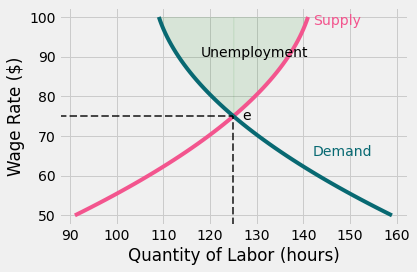

In [10]:
plt.plot(s, p, label='Supply', color='#f3558e')
plt.plot(d, p, label='Demand', color='#086972')
plt.axhline(y=75, xmax=.50, ls='--', lw=2, alpha=.7, color='k')
plt.axvline(x=125, ymax=.50, ls='--', lw=2, alpha=.7, color='k')
plt.annotate('Supply', (142, 98), color='#f3558e')
plt.annotate('Demand', (142, 65), color='#086972')
plt.annotate('Unemployment', (118, 90), color='k')
plt.annotate('e', (127, 74), color='k')
plt.fill_between(s, p, 100, where=(s >= d), alpha=.10, color='g')
plt.fill_between(d, p, 100, where=(s >= d), alpha=.10, color='g')
plt.xlabel("Quantity of Labor (hours)")
plt.ylabel("Wage Rate ($)")
plt.tight_layout()
#plt.savefig("Demand and Supply.png", dpi=500)
plt.show()

In [11]:
sl = np.linspace(0, 50, 51)
dl = np.linspace(50, 0, 51)
p = np.linspace(0, 50, 51)

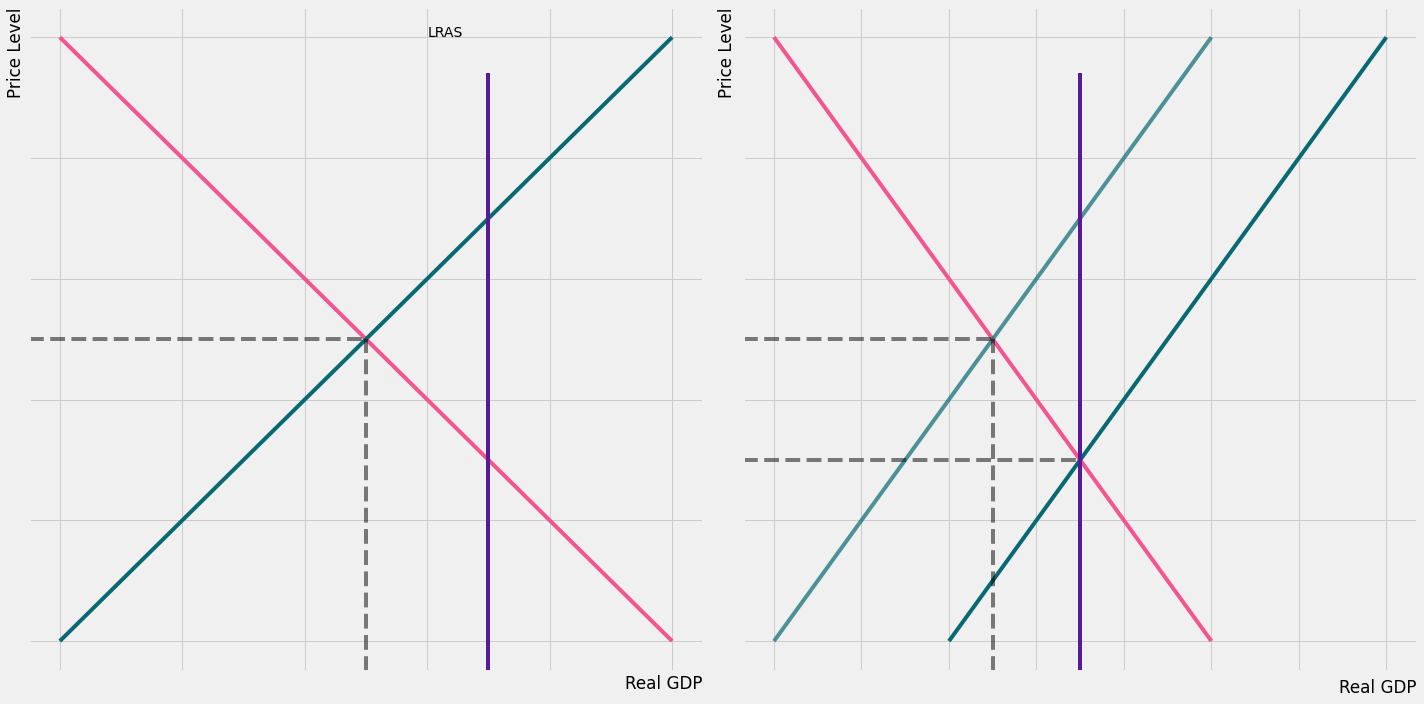

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(dl, p, color='#f3558e')
ax1.plot(sl, p, color='#086972')
ax1.axvline(35,ymax=.9 ,color='#581b98')
ax1.axhline(25, xmax=.5, ls='--', color='k', alpha=.50)
ax1.axvline(25, ymax=.5, ls='--', color='k', alpha=.50)
#ax1.set_xticks(ticks=[x for x in dl if x%10==0], labels=[])
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
ax1.set_xlabel("Real GDP", loc='right')
ax1.set_ylabel("Price Level", loc='top')
ax1.annotate("LRAS", (30, 50))

#################################
ax2.plot(dl, p, color='#f3558e')
ax2.plot(sl, p, color='#086972', alpha=.7)
ax2.plot(sl+20, p, color='#086972')
ax2.axvline(35,ymax=.9 ,color='#581b98')
ax2.axhline(25, xmax=.375, ls='--', color='k', alpha=.50)
ax2.axvline(25, ymax=.5, ls='--', color='k', alpha=.50)
ax2.axhline(15, xmax=.5, ls='--', color='k', alpha=.50)
#ax2.axes.xticks(ticks=sl, labels=[])
ax2.set_xlabel("Real GDP", loc='right')
ax2.set_ylabel("Price Level", loc='top')
plt.xticks(ticks=[x for x in np.linspace(0, 70, 8) if x%10==0], labels=[])
plt.yticks(ticks=[x for x in p if x%10==0], labels=[])

plt.tight_layout()
plt.show()

In [13]:
clean_df = df.drop(columns=['country_name', 'country_iso3', 'indicator_code']).set_index('year')

In [14]:
ind_grp = clean_df.groupby('indicator_name')

In [15]:
indicators = clean_df['indicator_name'].unique()

In [16]:
final_df = ind_grp.get_group('Trade in services (% of GDP)').transpose().drop(['indicator_name', 'value'])

In [17]:
for ind in indicators:
    final_df = final_df.append(ind_grp.get_group(ind).transpose().drop('indicator_name').rename(index={'value':ind}))

In [18]:
inflation = final_df[final_df.index.str.contains('Inflation')].loc['Inflation, consumer prices (annual %)'].dropna().astype(float).loc[1997:]

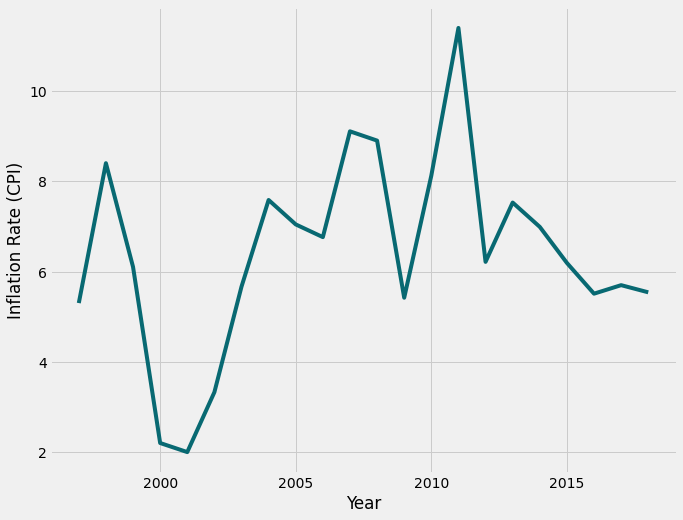

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(inflation, color='#086972')
plt.xlabel("Year")
plt.ylabel("Inflation Rate (CPI)")
plt.show()

In [20]:
pd.set_option("display.max_rows", 50)

In [21]:
unemp_df = pd.read_csv('API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_2163385.csv')

In [22]:
bd_unemp = unemp_df[unemp_df['Country Name']=='Bangladesh'].transpose().iloc[4:]

In [23]:
inf = final_df[final_df.index.str.contains('Inflation')].loc['Inflation, consumer prices (annual %)'].dropna().astype(float)

In [24]:
un = bd_unemp.dropna()

In [25]:
un.index = un.index.astype(int)

In [26]:
l = [x for x in inf.index if x in un.index]

In [27]:
data = un.loc[l].transpose().append(inf.loc[l], ignore_index=True)

In [28]:
data = data.astype(float)

In [29]:
datat = data.transpose()

In [31]:
datat.columns = ['unemployment', 'inflation']

<AxesSubplot:xlabel='unemployment', ylabel='inflation'>

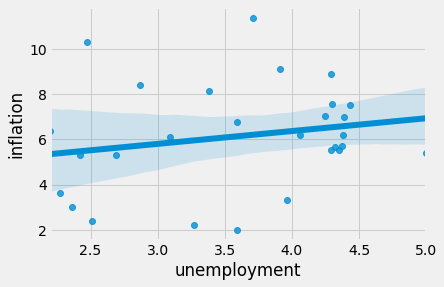

In [33]:
sns.regplot(data=datat, x='unemployment', y='inflation')

In [34]:
bd_unemp.columns = ['Unemployment Rate']

In [35]:
rel_unemp = bd_unemp.loc['1999':]

In [36]:
rel_unemp.index= rel_unemp.index.astype(int)

In [37]:
series = rel_unemp['Unemployment Rate'].astype(float)

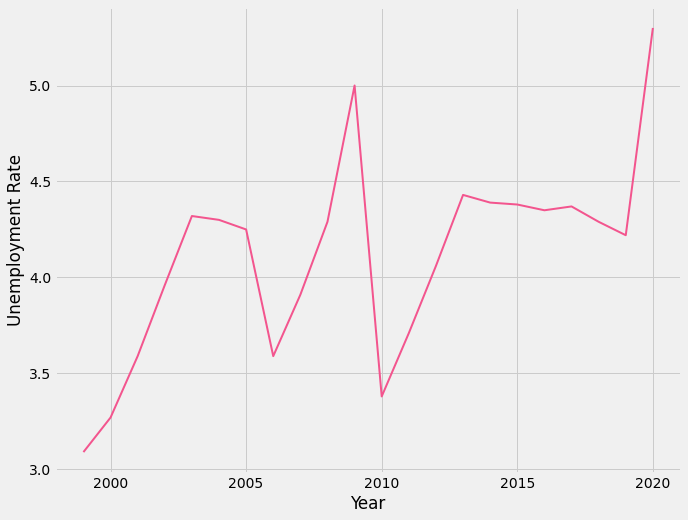

In [38]:
sns.mpl.pyplot.figure(figsize=(10, 8))
sns.lineplot(data=series, color='#f3558e', lw=2)
plt.xlabel('Year')
#plt.savefig('unemplyment.png', dpi=800)
plt.show()

In [39]:
ls = [x for x in inflation.index if x in series.index]

In [40]:
trend = np.linspace(1, 20, 1000)/3
actual = np.sin(np.linspace(1, 20, 1000))+trend

In [41]:
x = np.linspace(0, 1000, 6)

In [42]:
x = np.linspace(0, 1000, 1000)

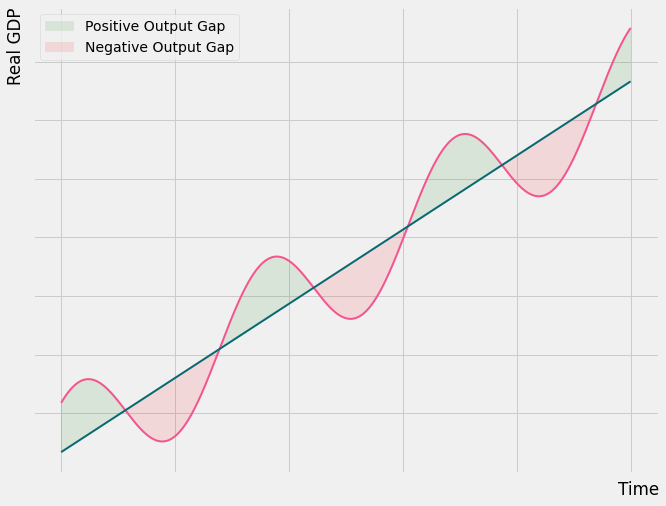

In [43]:
plt.figure(figsize=(10,8))
plt.plot(x, actual, color='#f3558e', lw=2)
plt.plot(x, trend, color='#086972', lw=2)
plt.fill_between(x, actual, trend, where=(trend<actual), color='g', alpha=.1, label='Positive Output Gap')
plt.fill_between(x, actual, trend, where=(trend>actual), color='r', alpha=.1, label='Negative Output Gap')
plt.xlabel("Time", loc='right')
plt.ylabel("Real GDP", loc='top')
plt.xticks(ticks=[0, 200, 400, 600, 800, 1000], labels=[])
plt.yticks(ticks=list(range(0, 8)), labels=[])
plt.legend()
#plt.savefig("cycle.png", dpi=800)
plt.show()

In [44]:
s = np.linspace(0, 50, 51)
d = np.linspace(50, 0, 51)

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(s, color='#086972')
plt.plot(d-10, color='#f3558e', alpha=.6)
plt.plot(d+10, color='#f3558e')
plt.axhline(20, xmax=.4, alpha=.30, color='k', ls=':')
plt.axvline(20, ymax=.44, alpha=.30, color='k', ls=':')
plt.axhline(30, xmax=.6, alpha=.50, color='k', ls='--')
plt.axvline(30, ymax=.85,  color='k', c='#581b98')
plt.title("Expansionary Fiscal Policy")
plt.xlabel("Real Output", loc='right')
plt.ylabel("Price Level", loc='top')
plt.xticks(ticks=np.linspace(0,50,6), labels=['','','$\mathregular{Q_1}$', '$\mathregular{Q_2}$', '', ''])
plt.yticks(ticks=np.linspace(-10,60,8), labels=['','','', '$\mathregular{P_1}$', '$\mathregular{P_2}$', '', '', ''])
#plt.yticks(ticks=np.linspace(0,60,7), labels=[])
plt.annotate("SRAS", (50, 48))
plt.annotate("LRAS", (28.5, 53))
plt.annotate("$\mathregular{AD_1}$", (50, -8))
plt.annotate("$\mathregular{e_1}$", (21, 19.5))
plt.annotate("$\mathregular{e_2}$", (31, 29.5))
plt.annotate("$\mathregular{AD_2}$", (50, 12))
plt.arrow(12, 30, dx=0,dy=15, width=.2, color='g', alpha=.4)
plt.arrow(38, 4, dx=0,dy=15, width=.2, color='g', alpha=.4)
#plt.savefig("increase in g.png", dpi=800)

plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(s, color='#086972')
plt.plot(d-10, color='#f3558e')
plt.plot(d+10, color='#f3558e', alpha=.6)
plt.axhline(20, xmax=.4, alpha=.50, color='k', ls='--')
plt.axvline(20, ymax=.44, alpha=.50, color='k', ls='--')
plt.axhline(30, xmax=.6, alpha=.30, color='k', ls=':')
plt.axvline(30, ymax=.85,  color='k', c='#581b98')
plt.title("If People Reduces Consumption")
plt.xlabel("Real Output", loc='right')
plt.ylabel("Price Level", loc='top')
plt.xticks(ticks=np.linspace(0,50,6), labels=['','','$\mathregular{Q_2}$', '$\mathregular{Q_1}$', '', ''])
plt.yticks(ticks=np.linspace(-10,60,8), labels=['','','', '$\mathregular{P_2}$', '$\mathregular{P_1}$', '', '', ''])
#plt.yticks(ticks=np.linspace(0,60,7), labels=[])
plt.annotate("SRAS", (50, 48))
plt.annotate("LRAS", (28.5, 53))
plt.annotate("$\mathregular{e_2}$", (21, 19.5))
plt.annotate("$\mathregular{e_1}$", (31, 29.5))
plt.annotate("$\mathregular{AD_1}$", (50, -8))
plt.annotate("$\mathregular{AD_1}$", (50, 12))
plt.arrow(12, 46, dx=0,dy=-15, width=.2, color='r', alpha=.4)
plt.arrow(38, 20, dx=0,dy=-15, width=.2, color='r', alpha=.4)
#plt.savefig("decrease in c.png", dpi=800)

plt.show()

In [60]:
from datetime import datetime

In [145]:
def d_parse(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [146]:
covid_cases = pd.read_csv('clean_cases.csv', parse_dates=['date'], date_parser=d_parse, index_col='date')

In [149]:
covid_cases.drop(columns=['Unnamed: 0'], inplace=True)

In [150]:
covid_rec = pd.read_csv('clean_rec.csv', parse_dates=['date'], date_parser=d_parse, index_col='date')

In [152]:
covid_rec.drop(columns=['Unnamed: 0'], inplace=True)

In [153]:
covid_death = pd.read_csv('covid_death.csv', parse_dates=['date'], date_parser=d_parse, index_col='date')

In [154]:
covid_death.drop(columns=['Unnamed: 0'], inplace=True)

In [219]:
covid_death.loc['2020-03-07':]

,death
date,
2020-03-07,0
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,0
...,...
2021-04-14,9987
2021-04-15,10081
2021-04-16,10182


In [221]:
d = covid_death.loc['2020-03-07':]['death']

In [222]:
c = covid_cases.loc['2020-03-07':]['cases']

In [223]:
r = covid_rec.loc['2020-03-07':]['recovered']

In [232]:
x = c.index

In [224]:
import matplotlib.dates as mpl_dates

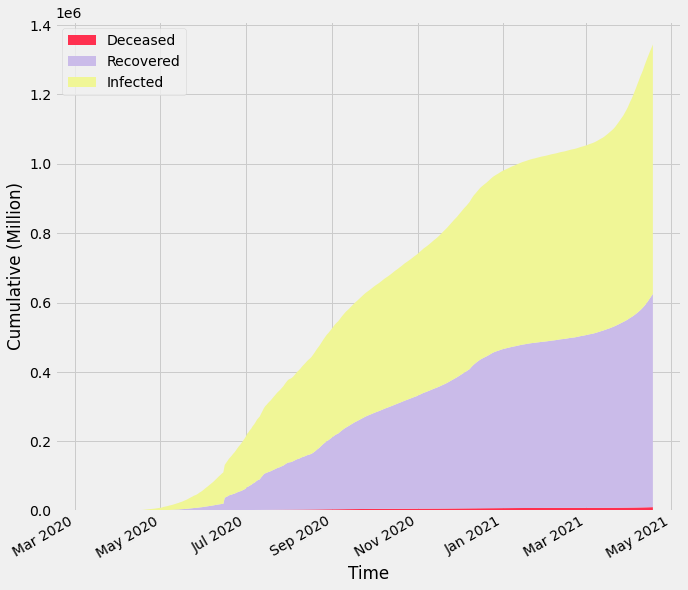

In [236]:
plt.figure(figsize=(10, 10))
plt.stackplot(x, d, r, c, colors=['#ff304f' ,'#cabbe9', '#f0f696'], labels=['Deceased', 'Recovered', 'Infected'])
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel("Time")
plt.ylabel('Cumulative (Million)')
plt.legend(loc=2)
#plt.savefig('covid.png', dpi=800)
plt.show()

In [237]:
inf_df = pd.read_csv('Asian Development Outlook Update 2020 (September 2020) - Inflation.csv')

In [249]:
inf_clean = inf_df[inf_df['Regional Member'] == 'Bangladesh'].loc[:, ['Year', 'Inflation']].set_index("Year")

In [255]:
inf_clean.index

Index(['2018', '2019', '2020 forecast', '2021 forecast'], dtype='object', name='Year')

In [271]:
inf_clean['Inflation']

Year
2018             5.8
2019             5.5
2020 forecast    5.7
2021 forecast    5.5
Name: Inflation, dtype: float64

In [287]:
gdp = {2018:7.9, 2019:8.2, 2020:5.2, 2021:6.8}

In [289]:
gdp_growth = pd.Series(gdp)

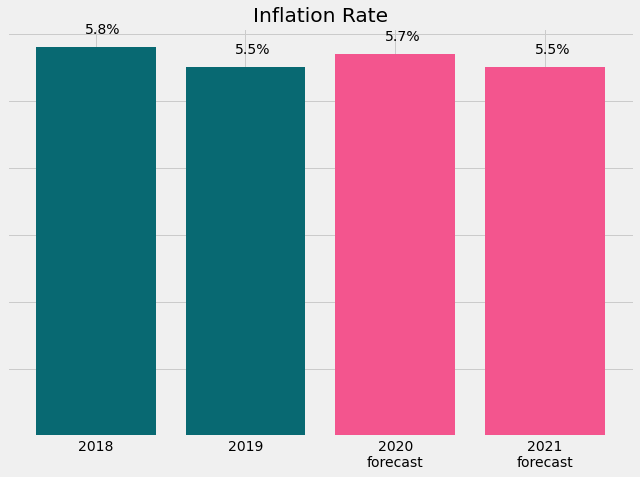

In [286]:
plt.figure(figsize=(10, 7))
plt.bar(x=inf_clean.index, height=inf_clean['Inflation'], color=['#086972', '#086972','#f3558e', '#f3558e'])
plt.yticks(ticks=list(range(0,7)), labels=[])
plt.xticks(ticks=list(range(0,4)), labels=[yr.replace(' ', '\n') for yr in inf_clean.index])
plt.title("Inflation Rate")
for ind, val in enumerate(inf_clean['Inflation']):
    plt.text(ind-.07, val+.2, s=str(val)+'%')
    
#plt.savefig("inflation.png", dpi=800)
plt.show()

In [296]:
gdp_growth.index = gdp_growth.index.astype(str)

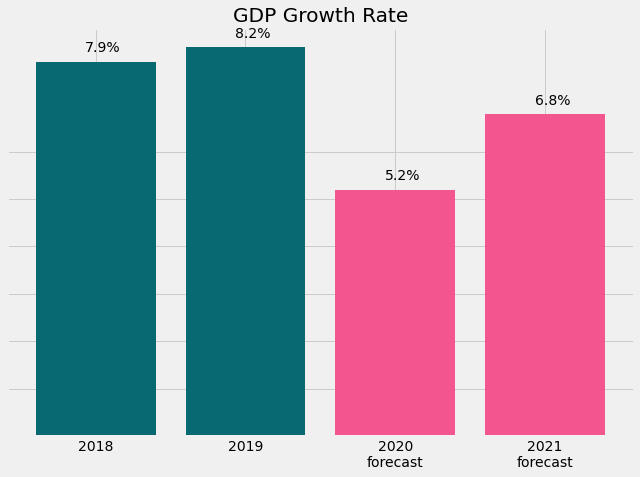

In [300]:
plt.figure(figsize=(10, 7))
plt.bar(x=gdp_growth.index, height=gdp_growth.values, color=['#086972', '#086972','#f3558e', '#f3558e'])
plt.yticks(ticks=list(range(0,7)), labels=[])
plt.xticks(ticks=list(range(0,4)), labels=[yr.replace(' ', '\n') for yr in inf_clean.index])
plt.title("GDP Growth Rate")
for ind, val in enumerate(gdp_growth.values):
    plt.text(ind-.07, val+.2, s=str(val)+'%')
    
#plt.savefig("gdp.png", dpi=800)
plt.show()